In [77]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import time
import datetime
import json
import requests
from scipy.stats import linregress

In [78]:
# Import API key
from config import api_key 

# citipy to determine city based on latitude and longitude
from citipy import citipy

# Output csv file
output_data_file = "WeatherPy_output.csv"

# Range of Latitudes and Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [79]:
 # Create lists to hold response data for lat_lngs and cities
lat_lngs = []
cities = []
    
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    if city not in cities:
        cities.append(city)

# Numbers of City
len(cities)

593

In [80]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

c_id= []
name = []
country = []
long = []
latt = []
cloudiness= []
date= []
humidity= []
max_temp = []
wind_speed = []
weather_json = {}

try:
    url = "http://api.openweathermap.org/data/2.5/weather?"
  
    for city in cities:
        query_url = url + "&q=" + city + "&APPID=" + api_key 
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        
        c_id.append(str(weather_json['id']))
        name.append(str(weather_json['name']))
        country.append(str(weather_json['sys']['country']))
        long.append(float(round(weather_json['coord']['lon'],2)))
        latt.append(float(round(weather_json['coord']['lat'],2)))
        cloudiness.append(float(weather_json['clouds']['all']))
        date.append(str(datetime.datetime.fromtimestamp(weather_json['dt']).strftime("%A, %d. %B %Y %I:%M%p")))
        humidity.append(float(weather_json['main']['humidity']))
        max_temp.append((1.8*(weather_json['main']['temp_max'] - 273) + 32))
        wind_speed.append(float(weather_json['wind']['speed']))
        
except KeyError:
    
    pass

# Build partial query URL
# query_url = url + "&q=" + city + "&APPID=" + api_key 
# print(query_url)


In [82]:
# Create DataFrame
weather_list_df = pd.DataFrame({'City ID':c_id,'City':name,'Country':country,'Lng':long,'Lat':latt, 'Cloudiness':cloudiness,  'Humidity': humidity, 'Date': date, 'Max Temp':max_temp, 'Wind Speed':wind_speed})
weather_list_df.to_csv(output_data_file, index = False)
weather_list_df.head()

,City ID,City,Country,Lng,Lat,Cloudiness,Humidity,Date,Max Temp,Wind Speed
0,2156643,Mount Gambier,AU,140.77,-37.83,90.0,72.0,"Saturday, 13. February 2021 04:06PM",57.470,4.12
1,3466750,Cassilândia,BR,-51.73,-19.11,100.0,85.0,"Saturday, 13. February 2021 04:06PM",74.696,0.81
2,2063056,Port Augusta,AU,137.77,-32.50,0.0,64.0,"Saturday, 13. February 2021 04:06PM",68.270,5.66
3,3517970,Pochutla,MX,-96.47,15.74,20.0,54.0,"Saturday, 13. February 2021 04:06PM",87.278,10.29
4,3366880,Hermanus,ZA,19.23,-34.42,0.0,88.0,"Saturday, 13. February 2021 04:06PM",68.270,2.85


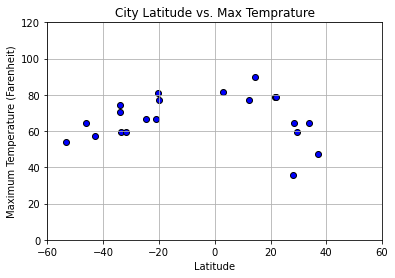

In [46]:
# Convert data to DataFrame
# Latitude vs. Temperature Plot
plt.scatter(weather_list_df['Lat'], weather_list_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(0,120)

# Set the upper and lower limits of our x axis
plt.xlim(-60,60)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max Temprature")
plt.ylabel("Maximum Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('output_data/Lat_MT.png')

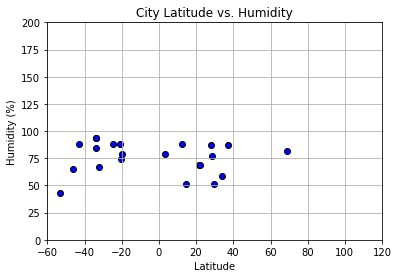

In [44]:
# Latitude vs. Humidity Plot
plt.scatter(weather_list_df['Lat'], weather_list_df['Humidity'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(0,200)

# Set the upper and lower limits of our x axis
plt.xlim(-60,120)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('output_data/Lat_Hum.png')

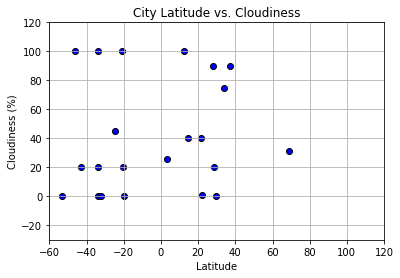

In [45]:
# Latitude vs. Cloudiness Plot
plt.scatter(weather_list_df['Lat'], weather_list_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(-30,120)

# Set the upper and lower limits of our x axis
plt.xlim(-60,120)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('output_data/Lat_Cl.png')

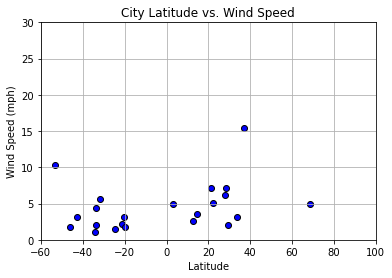

In [48]:
# Latitude vs. Wind Speed Plot

plt.scatter(weather_list_df['Lat'], weather_list_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(0,30)

# Set the upper and lower limits of our x axis
plt.xlim(-60,100)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('output_data/Lat_W.png')

In [49]:
# Create Northern and Southern Hemisphere DataFrames
northern_x_v = weather_list_df[weather_list_df['Lat']<1]
southern_x_v = weather_list_df[weather_list_df['Lat']>1]

The r-squared is: 0.7215454228458423


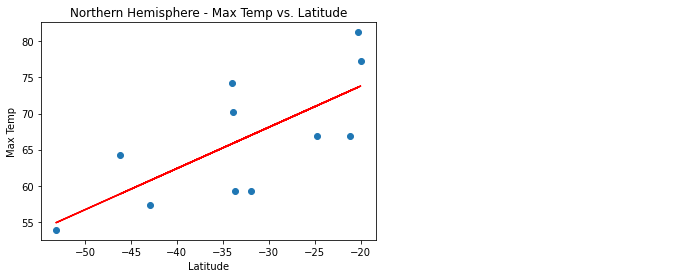

<Figure size 432x288 with 0 Axes>

In [61]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values=northern_x_v['Lat']
y_values = northern_x_v['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('output_data/N_linear_Lat_MT.png')

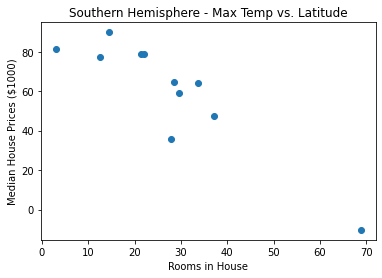

In [63]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values =southern_x_v['Lat']
y_values = southern_x_v['Max Temp']

plt.scatter(x_values,y_values)
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.show()

The r-squared is: 0.7215454228458423


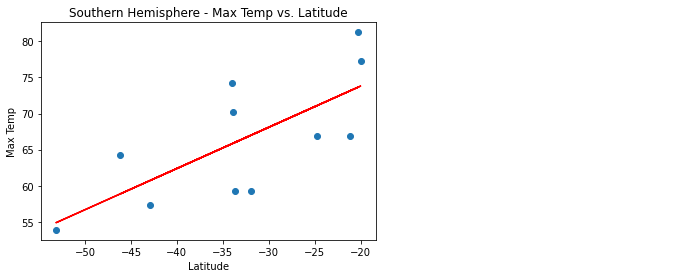

<Figure size 432x288 with 0 Axes>

In [62]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('output_data/S_linear_Lat_MT.png')

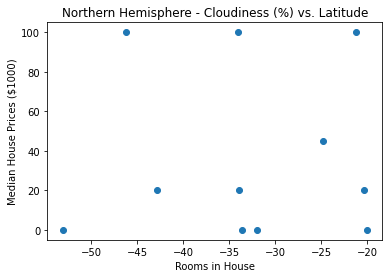

In [64]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values =northern_x_v['Lat']

y_values = northern_x_v['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.show()

The r-squared is: 0.0289938269398786


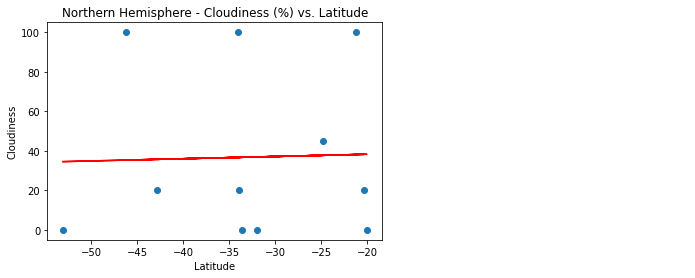

<Figure size 432x288 with 0 Axes>

In [65]:
# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('output_data/N_linear_Lat_Cl.png')

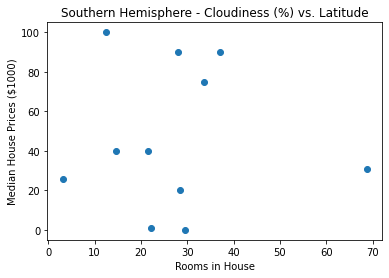

In [66]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values =southern_x_v['Lat']
y_values = southern_x_v['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.show()

The r-squared is: -0.013689799561791933


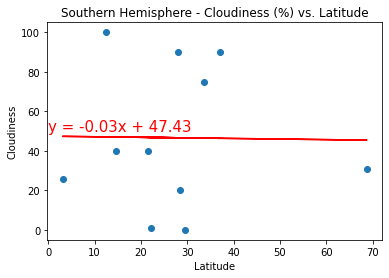

<Figure size 432x288 with 0 Axes>

In [67]:
# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('output_data/S_linear_Lat_Cl.png')

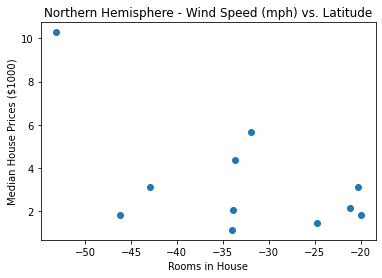

In [68]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_x_v['Lat']
y_values = northern_x_v['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.show()

The r-squared is: -0.5599062477656223


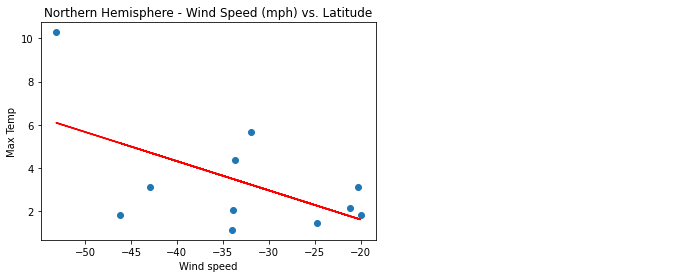

<Figure size 432x288 with 0 Axes>

In [69]:
# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,8),fontsize=15,color="red")
plt.xlabel('Wind speed')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('output_data/N_linear_Lat_W.png')

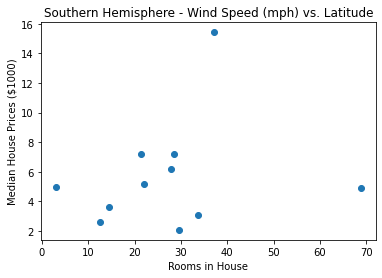

In [70]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = southern_x_v['Lat']

y_values = southern_x_v['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.show()


The r-squared is: 0.19753170330707803


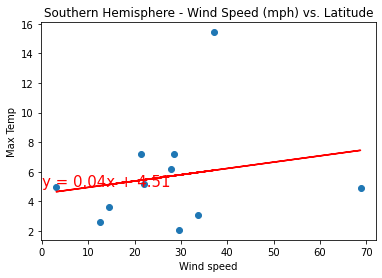

<Figure size 432x288 with 0 Axes>

In [71]:
# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel('Wind speed')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('output_data/S_linear_Lat_W.png')